<a href="https://colab.research.google.com/github/Gitau20/Aviva-Sample/blob/main/Fuji_Descent_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fuji Descent Problem**
Gradient descent can be compared to descending a mountain or valley. We will learn gradient descent by creating a program to descend from Mt. Fuji, with the elevation data of Mt. Fuji as the objective function we want to minimize .
# **Descending from Mount Fuji**
Load Mt Fuji Data

In [2]:
import numpy as np

csv_path = "mtfuji_data.csv" # using the url

np.set_printoptions(suppress=True) # Prohibit exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji[130:140]) # check a sample of the data

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


From the left, they are the "point number," "latitude," "longitude," "altitude," and "distance from point 0." The units of altitude and distance are meters. This is data for 300 points.

The data used this time was obtained using the cross-sectional view function of the Geospatial Information Authority of Japan's digital topographical map. It is elevation data for 300 points on a line that runs from Sagami Bay through the summit of Mt. Fuji toward the Southern Alps.

# **Data Visualization**
Use Matplotlib to visualize the elevation data. By setting the point number on the horizontal axis and the elevation on the vertical axis, you can draw a cross-section of Mt. Fuji.

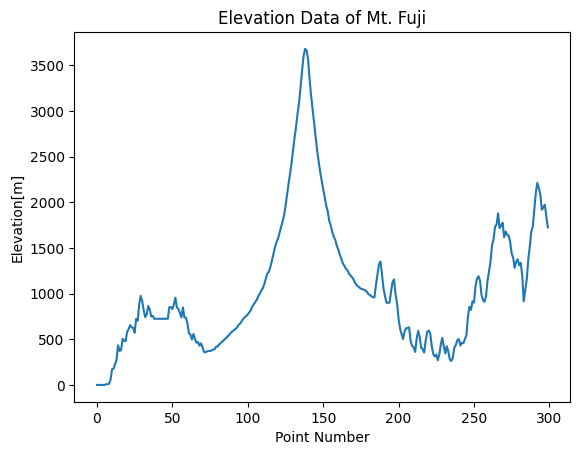

In [3]:
# Visualize the elevation data
import matplotlib.pyplot as plt

plt.plot(fuji[:, 0], fuji[:, 3])
plt.xlabel("Point Number")
plt.ylabel("Elevation[m]")
plt.title("Elevation Data of Mt. Fuji")
plt.show()

Looking at this cross-section, you can immediately see the low spots, but this time imagine a situation where you are in darkness and can only see the slope at your feet.
# **Create a function to calculate the gradient at a certain point**
In "Two-dimensional arrays and gradient problems," we first calculated the gradient at each point. However, if you imagine Mount Fuji in the dark, you can only know the gradient at your current point.

Please create a function that calculates the gradient based on the relationship between the "number of the current point" and the "number of the point next to you (the number of the current point - 1)".

The slope was calculated using the following formula, where y is the elevation and x is the point number.
gradient= (y1-y0)/(x1−x0)
Where:

𝑦1 - is the elevation at the current point,

𝑦0 - is the elevation at the previous point,

x 1  and 𝑥0 are the horizontal distances (in this case, these are in fuji[:, 0]).

In [4]:
def calculate_gradient(fuji, current_point):
  '''
  Calculate the gradient between the number of the current point and next point.
  Parameters:
    data (np.ndarray): column 0 is horizontal distance, and column 3 is elevation.
    current_point (int): Index of the current point in the data.

  Returns:
        float: Gradient between the current point and the previous point.
    '''
  if current_point <= 0:
        raise ValueError("Current point must be greater than 0 to calculate gradient with previous point.")

  x0 = fuji[current_point - 1, 0]
  x1 = fuji[current_point, 0]
  y0 = fuji[current_point - 1, 3]
  y1 = fuji[current_point, 3]

  gradient = (y1 - y0) / (x1 - x0)
  return gradient

# **Create a function to calculate the destination point**
Create a function that calculates the next destination point based on the gradient information of the current point.

Expressed mathematically, this can be expressed as "destination point = current point - $\alpha$ × gradient of current point."

For the "gradient at the current point", use the return value of the function created in Problem 2. $\alpha$ is a hyperparameter that can take any value greater than 0. In the field of machine learning, this is called the learning rate. The way the gradient descends changes depending on this value. Set it to 0.2 here, for example.

<<Notes on implementation>>

When calculating the above formula, the destination point will have a floating point number, but in order to obtain the gradient information this time, the point must be expressed as an integer. Therefore, perform the conversion by rounding. Also, it is necessary to handle the case where the value is not possible. For example, if the destination point is negative, the gradient cannot be obtained next time because there is no such data.
# **What are hyperparameters?**

In machine learning methods, hyperparameters are values ​​that the method itself cannot optimize. The behavior of the method changes depending on the value, and affects whether learning will be successful, so they must be set carefully. The simplest way is for a human to think about and set the hyperparameters, but there are also methods for mechanically determining hyperparameters.

In [5]:
def calculate_next_point(fuji, current_point, alpha):
    """
    Calculates the next point index using gradient descent.

    Parameters:
        fuji (np.ndarray): Elevation data.
        current_point (int): Current index.
        alpha (float): Learning rate.

    Returns:
        int: Next point index after applying gradient descent.
    """
    if current_point <= 0 or current_point >= len(fuji):
        raise ValueError("Current point index is out of valid range.")

    gradient = calculate_gradient(fuji, current_point)
    next_point = current_point - alpha * gradient
    next_point_rounded = int(round(next_point))

    # Clamp the next point to stay within valid range
    next_point_rounded = max(0, min(len(fuji) - 1, next_point_rounded))
    return next_point_rounded

# **Create a function to go down a mountain**
Please create a function to go down the mountain. It receives the initial location and updates the location using the function in Problem 3. Record the location for each movement in a list or something and use this as the return value of the function.

The first "current location" is near the summit of Mt. Fuji, point 136 (altitude 3434.59[m]). Let's start by heading down the mountain from here.

<<Notes on implementation>>

Because of the rounding in problem 3, the destination point may be the same as the current point. This means that the distance traveled has decreased, so you can assume that you have reached the bottom of the mountain. This does not happen in real gradient descent.

In [6]:
def descend_mountain(fuji, start_point=136, alpha=0.2, max_steps=1000):
    """
    Simulates descending Mt. Fuji using gradient descent.

    Parameters:
        data (np.ndarray): Elevation data. Column 0 = horizontal distance, Column 3 = elevation.
        start_point (int): Starting point index (near summit).
        alpha (float): Learning rate (step size). Must be > 0.

    Returns:
        list: List of visited point indices during the descent.
    """
    path = [start_point]
    current_point = start_point

    while True:
        next_point = calculate_next_point(fuji, current_point, alpha)

        if next_point == current_point:
            break  # No movement → assumed to be at the bottom

        path.append(next_point)
        current_point = next_point

    return path

# Visualization of the descent process
Visualize the descent process in Problem 4 using Matplotlib.

Visualization example

Display the moved point as a dot in the cross section
Create a line graph of the elevation and gradient for each iteration

In [7]:
def visualize_descent(fuji, path, alpha=0.2, max_steps=1000):
    import matplotlib.pyplot as plt

    # Extract data for full elevation
    x_all = fuji[:, 0]
    y_all = fuji[:, 3]

    # Extract path elevations and positions
    path_x = [fuji[i, 0] for i in path]
    path_y = [fuji[i, 3] for i in path]

    # 1. Plot descent on full elevation profile
    plt.figure(figsize=(10, 4))
    plt.plot(x_all, y_all, label='Mt. Fuji Elevation')
    plt.scatter(path_x, path_y, color='red', label='Descent Path', zorder=5)

    # Add labels to each step
    for step, (x, y) in enumerate(zip(path_x, path_y)):
        plt.text(x, y + 10, str(step), fontsize=8, ha='center', color='blue')

    plt.title('Descent Path on Mt. Fuji Cross Section')
    plt.xlabel('Horizontal Distance')
    plt.ylabel('Elevation [m]')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2. Plot elevation and gradient at each descent step
    elevations = [fuji[i, 3] for i in path]
    gradients = [calculate_gradient(fuji, i) for i in path if i > 0]

    # Padding to match lengths for plotting (first step has no gradient)
    gradients = [calculate_gradient(fuji, i) if i > 0 else np.nan for i in path]

    plt.figure(figsize=(10, 4))
    plt.plot(range(len(path)), elevations, marker='o', label='Elevation [m]')
    plt.plot(range(len(path)), gradients, marker='x', label='Gradient')
    plt.title('Elevation and Gradient per Step during Descent')
    plt.xlabel('Step')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

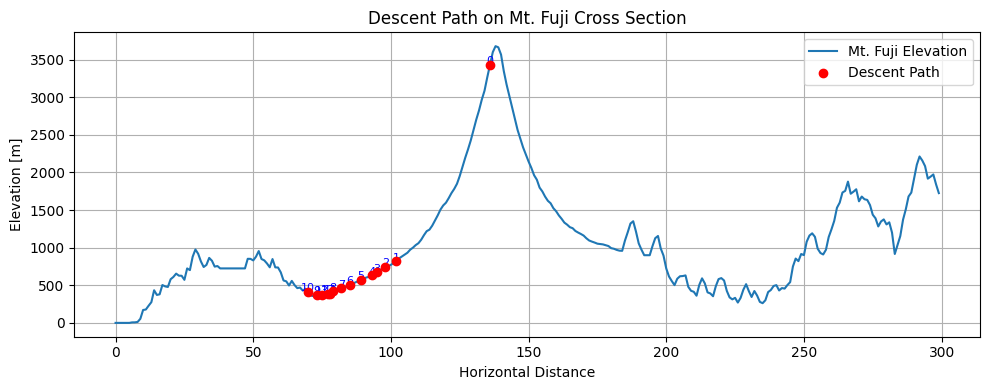

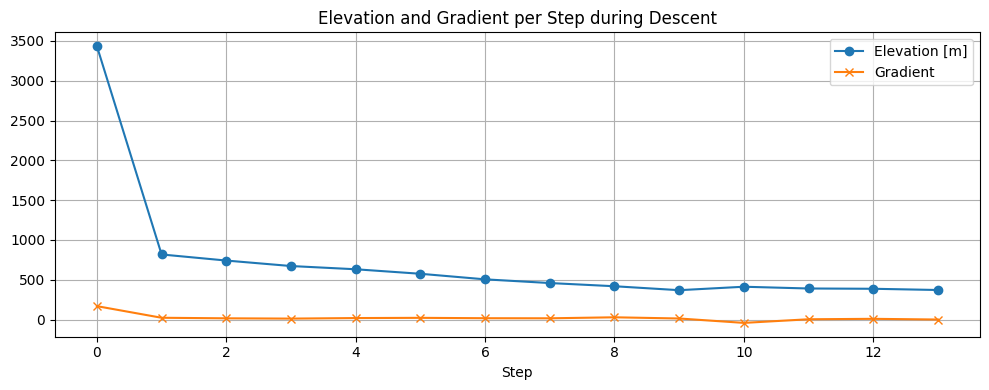

In [8]:
descent_path = descend_mountain(fuji, start_point=136, alpha=0.2)
visualize_descent(fuji, descent_path)

# Changing the initial value
In problem 4, the initial "current point" was fixed at 136, but please calculate this for all other points. Specifically, you need to be able to change the "current point."

In [9]:
def descend_mountain(fuji, start_point, alpha=0.2, max_steps=1000):
    path = [start_point]
    current_point = start_point

    for _ in range(max_steps):
        next_point = calculate_next_point(fuji, current_point, alpha)

        # Stop if descent has converged
        if next_point == current_point:
            break

        # Extra safety: stop if looping detected (optional)
        if next_point in path:
            print(f"Loop detected at point {next_point}, breaking early.")
            break

        path.append(next_point)
        current_point = next_point

    return path

In [10]:
def run_all_descents(fuji, alpha=0.2):
    """
    Runs gradient descent from all valid starting points.

    Parameters:
        data (np.ndarray): Elevation data.
        alpha (float): Learning rate.

    Returns:
        dict: Mapping from starting point index to descent path.
    """
    results = {}
    for start in range(1, len(fuji)):
        path = descend_mountain(fuji, start_point=start, alpha=alpha)
        results[start] = path
    return results

In [11]:
def calculate_next_point(fuji, current_point, alpha):
    if current_point <= 0 or current_point >= len(fuji) - 1:
        return current_point  # Stay if out of bounds

    gradient = calculate_gradient(fuji, current_point)
    next_point = current_point - alpha * gradient
    next_point_rounded = int(round(next_point))

    # Clamp to valid range (avoid 0 to prevent gradient error)
    next_point_rounded = max(1, min(next_point_rounded, len(fuji) - 1))
    return next_point_rounded

Descent from point 100: [100, 96, 90, 87, 84, 81, 77, 75]


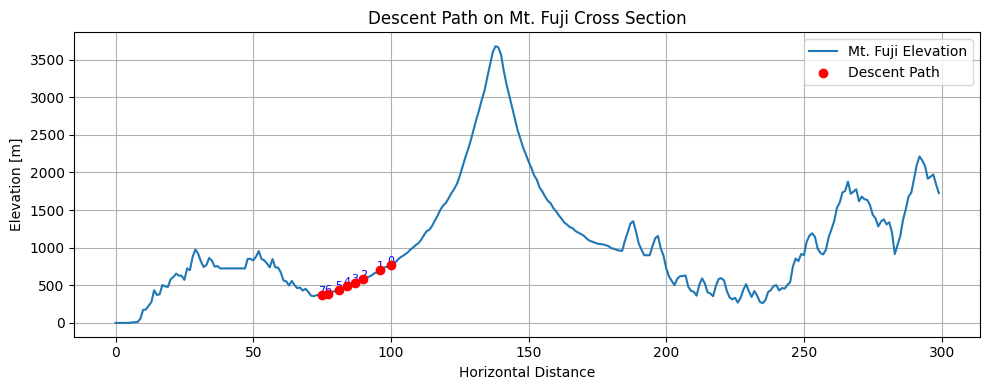

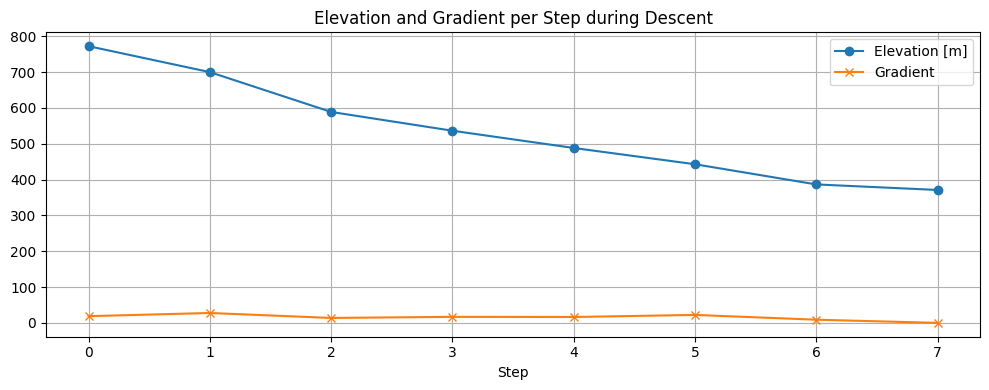

In [12]:
# Run descent from a custom point (e.g., point 100)
custom_path = descend_mountain(fuji, start_point=100, alpha=0.2)
print("Descent from point 100:", custom_path)
visualize_descent(fuji, custom_path)

# Visualization of the descent process for each initial value
In problem 6, we calculated the descent process for all initial values. Now, visualize the descent process for several initial values ​​as in problem 5. You can see that the initial values ​​affect the results in gradient descent.

What is the initial value?

The value, such as the first point in this example, is called the initial value. Changing this will change the result. For example, 136 and 142 will go down different slopes of Mt. Fuji.

In [13]:
def visualize_multiple_descents(fuji, start_points, alpha=0.2, max_steps=1000):
    import matplotlib.pyplot as plt

    # Full elevation profile
    x_all = fuji[:, 0]
    y_all = fuji[:, 3]

    plt.figure(figsize=(12, 5))
    plt.plot(x_all, y_all, label="Mt. Fuji Elevation", color='gray', linewidth=1)

    # Plot each descent path
    for start in start_points:
        path = descend_mountain(fuji, start_point=start, alpha=alpha)
        path_x = [fuji[i, 0] for i in path]
        path_y = [fuji[i, 3] for i in path]
        plt.plot(path_x, path_y, marker='o', label=f'Start at {start}')

    plt.title("Descent Paths from Different Initial Values")
    plt.xlabel("Horizontal Distance")
    plt.ylabel("Elevation [m]")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Loop detected at point 177, breaking early.
Loop detected at point 169, breaking early.


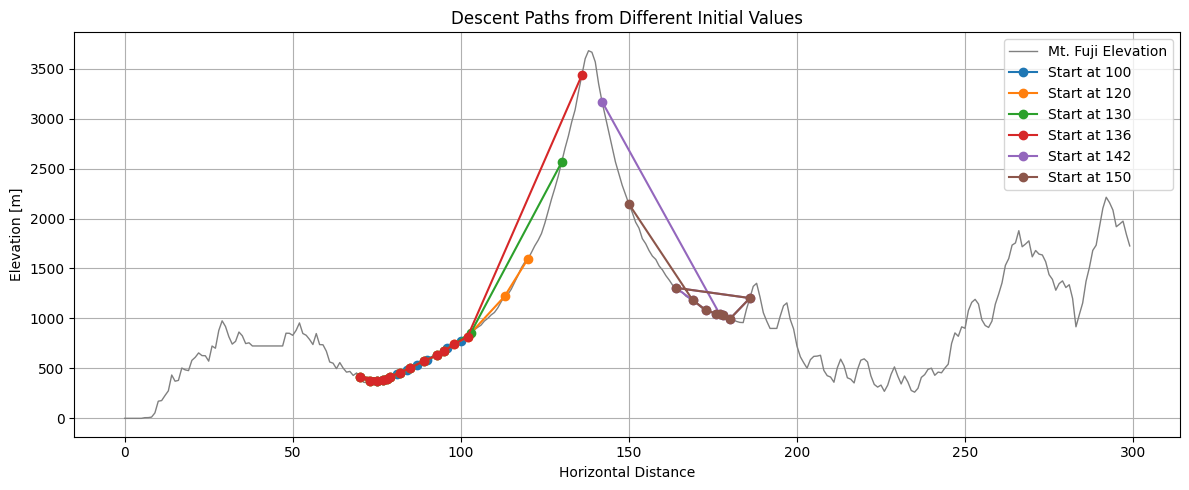

In [14]:
# Choose several interesting starting points
initial_points = [100, 120, 130, 136, 142, 150]

# Visualize their descent paths
visualize_multiple_descents(fuji, initial_points, alpha=0.2, max_steps=1000)


# (Advanced problem) Changing hyperparameters
Visualize the descent process as shown in Problem 5, by changing the hyperparameter $\alpha$. Then, confirm that the results vary significantly depending on the hyperparameter.

In [15]:
def visualize_descent_for_alphas(fuji, start_point=136, alphas=[0.01, 0.1, 0.2, 0.5, 1.0]):
    import matplotlib.pyplot as plt

    x_all = fuji[:, 0]
    y_all = fuji[:, 3]

    plt.figure(figsize=(12, 5))
    plt.plot(x_all, y_all, color='gray', label='Mt. Fuji Elevation', linewidth=1)

    for alpha in alphas:
        path = descend_mountain(fuji, start_point=start_point, alpha=alpha)
        path_x = [fuji[i, 0] for i in path]
        path_y = [fuji[i, 3] for i in path]
        plt.plot(path_x, path_y, marker='o', label=f'α = {alpha}')

    plt.title(f'Descent Paths from Point {start_point} with Different α')
    plt.xlabel("Horizontal Distance")
    plt.ylabel("Elevation [m]")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

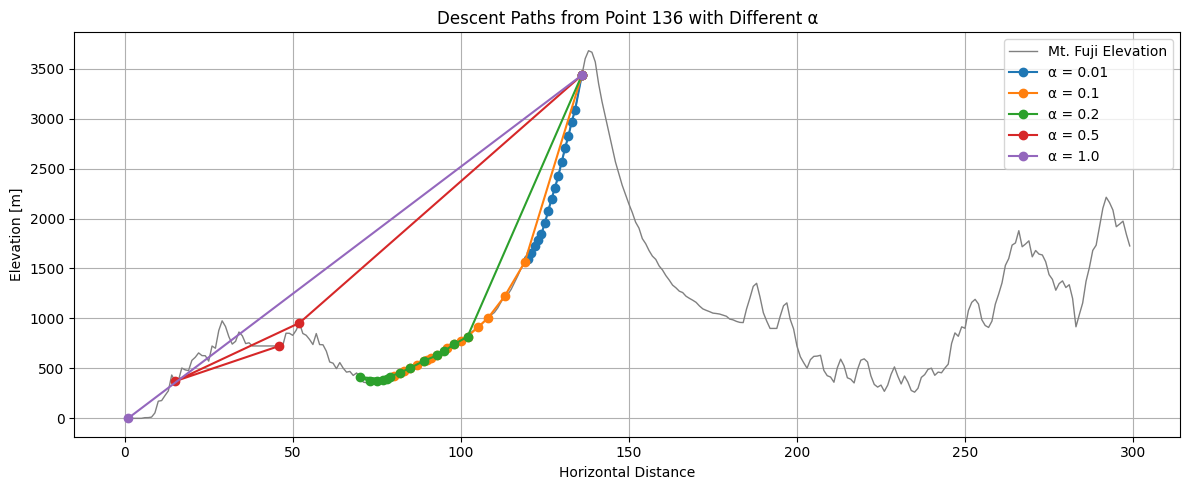

In [16]:
# Try different learning rates
alpha_values = [0.01, 0.1, 0.2, 0.5, 1.0]
visualize_descent_for_alphas(fuji, start_point=136, alphas=alpha_values)